In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [28]:
R = 40e6  #Ohm
C = 250e-12 #F

V_rep = -0.07 #V
V_L = -0.05   #V
V_redef = -0.08  #V

tau_ref = 2e-3     #s
dt = 0.01e-3   #s
tmax = 1.5    #s
tau_a = 0.2 #s

b = 1e-9    #S

V0 = V_rep  #V
G0 = 0

interacoes = 150000

In [29]:
def solucao(v0, g0, dt, I):
    V = np.zeros(np.size(I))
    Ga = np.zeros(np.size(I))


    V[0] = v0
    Ga[0] = g0

    for i in range(np.size(I)-1):
        v = V[i]
        ga = Ga[i]

        if v >= V_L:
            v = V_redef
            ga = ga + b
        else:
            V[i+1] = v + dt * ( (1/R * (V_rep - v) + ga * (V_redef - v) + I[i]) / C )
            Ga[i+1] = ga + dt * ( -ga / tau_a)

    return V, Ga

In [30]:
t = np.arange(0, tmax, dt)
I = np.arange(400e-12, 800e-12, 20e-12)
limiar = np.full(np.size(I), V_L)
V, Ga = solucao(V0, G0, dt, I)

ValueError: x and y must have same first dimension, but have shapes (1,) and (21,)

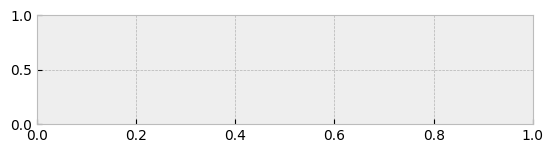

In [31]:
plt.style.use('bmh')

plt.figure()

plt.subplot(3,1,1)
plt.plot(21, I*1e12)
plt.ylabel('I (pA)')

plt.subplot(3,1,2)
plt.plot(21, V*1e3)
plt.plot(21, limiar*1e3, 'k--', label='VL')
plt.ylabel('V (mV)')
plt.legend()

plt.subplot(3,1,3)
plt.plot(t, Ga)
plt.ylabel('Ga')
plt.xlabel('t (s)')


plt.show()